In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from shapely.geometry import Point
import pandas as pd
import numpy as np

In [2]:
# !pip install rasterio

In [3]:
stations_df = pd.read_csv('data/stations.csv')
glorich_df = pd.read_csv('data/final_imputed_glorich.csv')
landsat_df = pd.read_csv('data/landsat_features_training.csv')

In [4]:
def df_to_gdf(df):
    df["geometry"] = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
    return gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

In [5]:
glorich_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110925 entries, 0 to 110924
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STAT_ID                  110925 non-null  int64  
 1   Latitude                 110925 non-null  float64
 2   Longitude                110925 non-null  float64
 3   geometry                 110925 non-null  object 
 4   sc                       110925 non-null  float64
 5   ss                       110925 non-null  float64
 6   su                       110925 non-null  float64
 7   mt                       110925 non-null  float64
 8   va                       110925 non-null  float64
 9   vb                       110925 non-null  float64
 10  vi                       110925 non-null  float64
 11  pa                       110925 non-null  float64
 12  pb                       110925 non-null  float64
 13  pi                       110925 non-null  float64
 14  GLC_

In [6]:
stations_gdf = df_to_gdf(stations_df)
landsat_gdf = df_to_gdf(landsat_df)

In [7]:
!pip install contextily

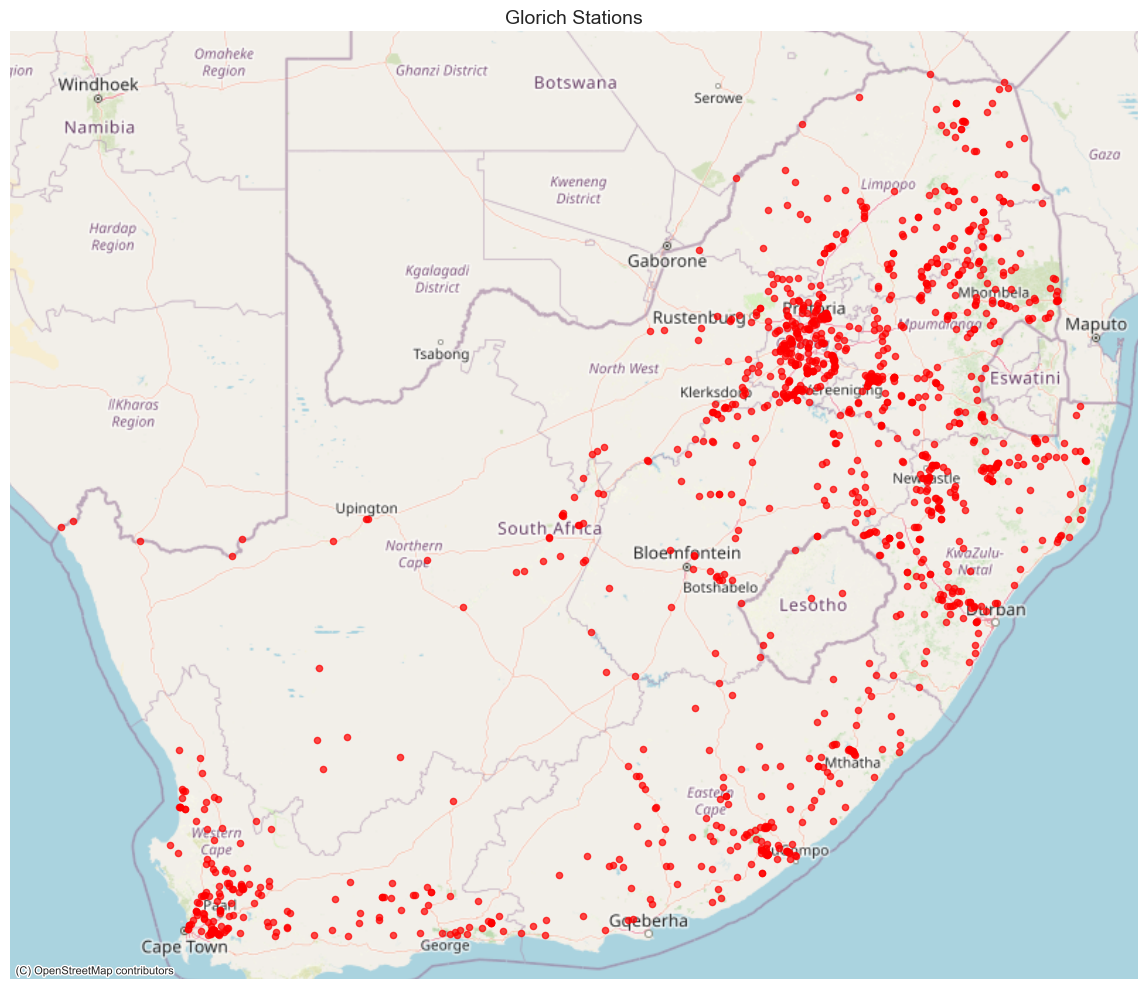

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # pip install contextily — adds a basemap


# ── Static plot with basemap ─────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 10))

stations_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    color='red',
    markersize=20,
    alpha=0.7,
    label='Stations'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Glorich Stations", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

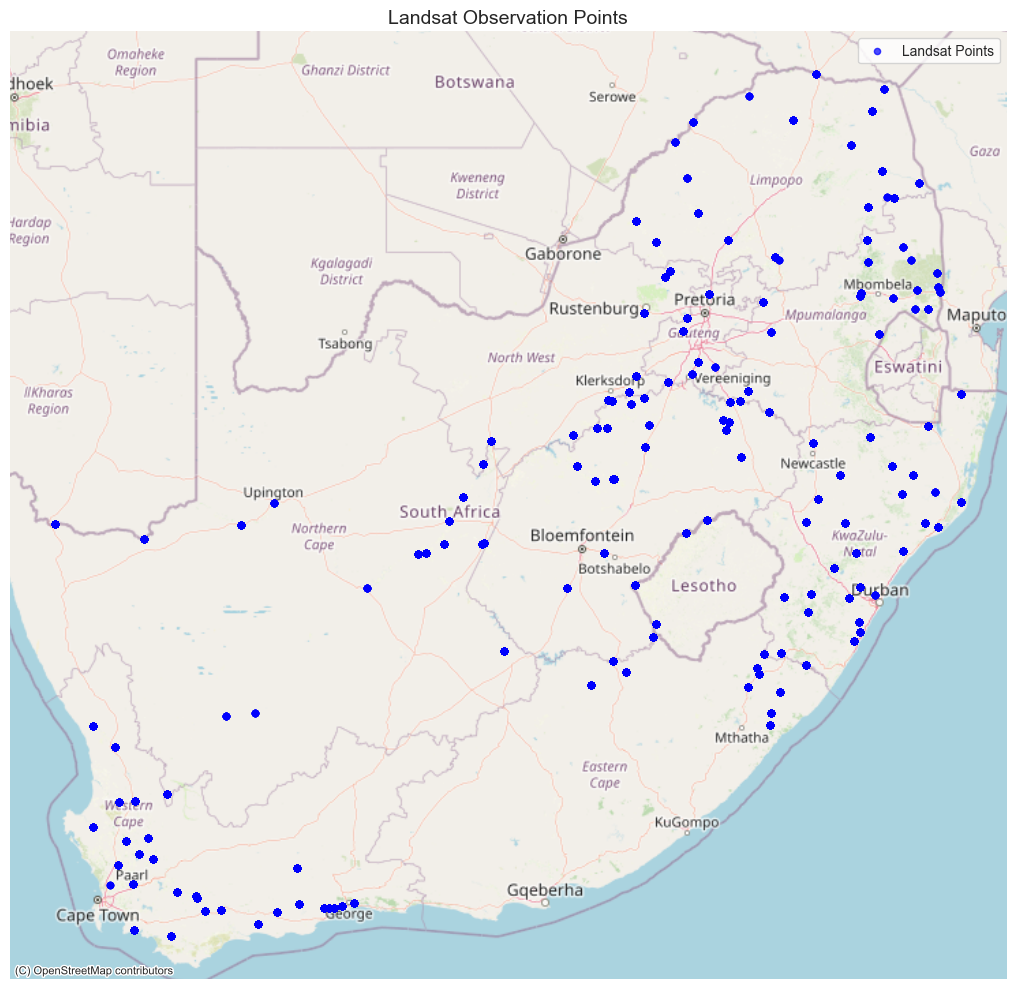

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))

landsat_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    color='blue',
    markersize=20,
    alpha=0.7,
    label='Landsat Points'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Landsat Observation Points", fontsize=14)
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
stations_m = stations_gdf.to_crs(epsg=3857)
landsat_m  = landsat_gdf.to_crs(epsg=3857)

landsat_to_station = gpd.sjoin_nearest(
    landsat_m, # LEFT: each landsat point
    stations_m,  # RIGHT: station candidates
    how="left",
    distance_col="dist_m"
)

landsat_to_station["dist_km"] = landsat_to_station["dist_m"] / 1000
landsat_to_station = landsat_to_station.rename(columns= {'Latitude_left': 'Latitude', 'Longitude_left': 'Longitude', 'Latitude_right': 'Latitude_stations', 'Longitude_right': 'Longitude_stations'})

landsat_to_station.head()

,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,geometry,index_right,STAT_ID,Latitude_stations,Longitude_stations,dist_m,dist_km
0,-28.760833,17.730278,02-01-2011,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,POINT (1973725.519 -3345240.51),302,400473,-28.76,17.73,110.212010,0.110212
1,-26.861111,28.884722,03-01-2011,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,POINT (3215432.545 -3106130.094),1089,401454,-26.86,28.88,543.624662,0.543625
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1129,401494,-26.45,28.08,649.326590,0.649327
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1103,401468,-26.45,28.08,649.326590,0.649327
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1124,401489,-26.45,28.08,649.326590,0.649327


In [12]:
landsat_to_station.head()

,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,geometry,index_right,STAT_ID,Latitude_stations,Longitude_stations,dist_m,dist_km
0,-28.760833,17.730278,02-01-2011,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,POINT (1973725.519 -3345240.51),302,400473,-28.76,17.73,110.212010,0.110212
1,-26.861111,28.884722,03-01-2011,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,POINT (3215432.545 -3106130.094),1089,401454,-26.86,28.88,543.624662,0.543625
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1129,401494,-26.45,28.08,649.326590,0.649327
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1103,401468,-26.45,28.08,649.326590,0.649327
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),1124,401489,-26.45,28.08,649.326590,0.649327


In [13]:
landsat_to_station['STAT_ID'].unique()

array([400473, 401454, 401494, 401468, 401489, 401550, 401551, 401103,
       401464, 401317, 401342, 401355, 400976, 401480, 400888, 401549,
       400573, 400481, 401344, 401475, 401460, 401467, 401472, 401552,
       400449, 401455, 401457, 400446, 400447, 400480, 401334, 401493,
       400712, 401327, 401535, 400557, 401313, 401553, 400075, 400454,
       400460, 400469, 401537, 400867, 400724, 400781, 400845, 401568,
       401040, 400522, 400487, 401482, 401567, 400709, 400713, 401248,
       400491, 400493, 401117, 401388, 401236, 401409, 401423, 400045,
       400540, 400545, 400552, 401435, 400832, 400890, 401444, 401014,
       400784, 401456, 401522, 400453, 401300, 400808, 400720, 400725,
       400869, 400846, 400717, 400758, 401301, 400752, 401304, 400585,
       401384, 401362, 401364, 400813, 400448, 401375, 400229, 401430,
       401438, 401374, 400844, 400787, 400728, 400710, 400806, 401359,
       400759, 400807, 401133, 400760, 400778, 401528, 400833, 400785,
      

In [14]:
landsat_to_station.to_csv('data/landsat_to_station.csv', index=False)

## Adding hydrochem properties to the station data

In [23]:
glorich_df.tail()

,STAT_ID,Latitude,Longitude,geometry,sc,ss,su,mt,va,vb,...,DIP,SO4,SpecCond25C,pH,Alkalinity_reliability,Cl_reliability,DIP_reliability,SO4_reliability,SpecCond25C_reliability,pH_reliability
110920,401573,-27.66,25.61,POINT (25.61 -27.66),0.05,0.68,0.0,0.01,0.02,0.16,...,1.048448,1489.069,67.1,7.181231,1.0,0.4,1.0,0.4,0.4,0.7
110921,401573,-27.66,25.61,POINT (25.61 -27.66),0.05,0.68,0.0,0.01,0.02,0.16,...,1.048448,1489.069,67.1,7.181231,1.0,0.4,1.0,0.4,0.4,0.7
110922,401573,-27.66,25.61,POINT (25.61 -27.66),0.05,0.68,0.0,0.01,0.02,0.16,...,1.048448,1489.069,67.1,7.181231,1.0,0.4,1.0,0.4,0.4,0.7
110923,401573,-27.66,25.61,POINT (25.61 -27.66),0.05,0.68,0.0,0.01,0.02,0.16,...,1.048448,1489.069,67.1,7.181231,1.0,0.4,1.0,0.4,0.4,0.7
110924,401573,-27.66,25.61,POINT (25.61 -27.66),0.05,0.68,0.0,0.01,0.02,0.16,...,1.048448,1489.069,67.1,7.181231,1.0,0.4,1.0,0.4,0.4,0.7


In [24]:
glorich_df['date'] = pd.to_datetime(glorich_df['date'], format='%Y-%m-%d')
glorich_df['date'].describe()

count                 110640
mean     2013-06-23 06:24:00
min      2011-01-01 00:00:00
25%      2012-03-27 18:00:00
50%      2013-06-23 00:00:00
75%      2014-09-19 00:00:00
max      2015-12-15 00:00:00
Name: date, dtype: object

In [25]:
landsat_to_station['Sample Date'] = pd.to_datetime(
    landsat_to_station['Sample Date'], format='%d-%m-%Y'
)
landsat_to_station['Sample Date'].describe()

count                            10225
mean     2013-08-06 10:23:02.259168768
min                2011-01-02 00:00:00
25%                2012-06-14 00:00:00
50%                2013-08-27 00:00:00
75%                2014-10-14 00:00:00
max                2015-12-31 00:00:00
Name: Sample Date, dtype: object

In [26]:
# ── 3. merge_asof requires both frames sorted by the date key ────────────────
glorich_with_date = glorich_df.dropna(subset=['date'])
landsat_sorted  = landsat_to_station.sort_values('Sample Date').reset_index(drop=True)
glorich_sorted  = glorich_with_date.sort_values('date').reset_index(drop=True)

# ── 4. Nearest-date join, matched within the same station ───────────────────
#   • direction='nearest'  → picks the glorich row whose date is closest
#     (before OR after) to the landsat observation date
#   • by='STAT_ID'         → only considers glorich rows for the same station
#   • how='left' is implicit in merge_asof; stations with no glorich data
#     will get NaN for all glorich columns (your case 3) ───────────────────

merged = pd.merge_asof(
    landsat_sorted,
    glorich_sorted,
    left_on='Sample Date',
    right_on='date',
    by='STAT_ID',
    direction='nearest',
    suffixes=('_landsat', '_glorich')
)

In [27]:
merged['date_diff_days'] = (
    merged['Sample Date'] - merged['date']
).dt.days.abs()

merged.head()

,Latitude_landsat,Longitude_landsat,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,geometry_landsat,...,SO4,SpecCond25C,pH,Alkalinity_reliability,Cl_reliability,DIP_reliability,SO4_reliability,SpecCond25C_reliability,pH_reliability,date_diff_days
0,-28.760833,17.730278,2011-01-02,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,POINT (1973725.519 -3345240.51),...,426.872176,30.440000,7.904400,0.4,0.4,1.0,1.0,0.4,0.4,1.0
1,-26.861111,28.884722,2011-01-03,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,POINT (3215432.545 -3106130.094),...,651.088335,57.604498,7.800000,1.0,1.0,0.4,1.0,1.0,0.4,2.0
2,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,1716.721075,77.964187,7.435217,0.4,1.0,1.0,1.0,1.0,0.7,2.0
3,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merged.drop(columns=['index_right', 'Latitude_stations', 'Longitude_stations'], inplace=True)


In [29]:
merged = merged.rename(columns={'Latitude_landsat': 'Latitude', 'Longitude_landsat': 'Longitude'})

In [30]:
merged.head()

,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,geometry_landsat,...,SO4,SpecCond25C,pH,Alkalinity_reliability,Cl_reliability,DIP_reliability,SO4_reliability,SpecCond25C_reliability,pH_reliability,date_diff_days
0,-28.760833,17.730278,2011-01-02,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,POINT (1973725.519 -3345240.51),...,426.872176,30.440000,7.904400,0.4,0.4,1.0,1.0,0.4,0.4,1.0
1,-26.861111,28.884722,2011-01-03,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,POINT (3215432.545 -3106130.094),...,651.088335,57.604498,7.800000,1.0,1.0,0.4,1.0,1.0,0.4,2.0
2,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,1716.721075,77.964187,7.435217,0.4,1.0,1.0,1.0,1.0,0.7,2.0
3,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-26.450000,28.085833,2011-01-03,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,POINT (3126500.628 -3054922.969),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merged.isna().sum()


Latitude                      0
Longitude                     0
Sample Date                   0
nir                        1122
green                      1122
swir16                     1122
swir22                     1122
NDMI                       1122
MNDWI                      1122
geometry_landsat              0
STAT_ID                       0
dist_m                        0
dist_km                       0
Latitude_glorich           1388
Longitude_glorich          1388
geometry_glorich           1388
sc                         1388
ss                         1388
su                         1388
mt                         1388
va                         1388
vb                         1388
vi                         1388
pa                         1388
pb                         1388
pi                         1388
GLC_Artificial             1388
GLC_Managed                1388
GLC_Water                  1388
GLC_Aquatic_Veg            1388
GLC_PERC_COV               1388
Popdens_

In [32]:
len(merged)

10225

In [33]:
landsat_ids = set(landsat_sorted['STAT_ID'].unique())
glorich_ids = set(glorich_with_date['STAT_ID'].unique())

print("Landsat STAT_IDs:  ", len(landsat_ids))
print("Glorich STAT_IDs:  ", len(glorich_ids))
print("Overlapping IDs:   ", len(landsat_ids & glorich_ids))
print()
print("Sample landsat IDs:", sorted(landsat_ids)[:10])
print("Sample glorich IDs:", sorted(glorich_ids)[:10])

Landsat STAT_IDs:   160
Glorich STAT_IDs:   922
Overlapping IDs:    137

Sample landsat IDs: [np.int64(400011), np.int64(400045), np.int64(400075), np.int64(400229), np.int64(400444), np.int64(400445), np.int64(400446), np.int64(400447), np.int64(400448), np.int64(400449)]
Sample glorich IDs: [np.int64(400020), np.int64(400021), np.int64(400022), np.int64(400023), np.int64(400024), np.int64(400025), np.int64(400026), np.int64(400027), np.int64(400028), np.int64(400029)]


In [36]:
merged.columns

Index(['Latitude', 'Longitude', 'Sample Date', 'nir', 'green', 'swir16',
       'swir22', 'NDMI', 'MNDWI', 'geometry_landsat', 'STAT_ID', 'dist_m',
       'dist_km', 'Latitude_glorich', 'Longitude_glorich', 'geometry_glorich',
       'sc', 'ss', 'su', 'mt', 'va', 'vb', 'vi', 'pa', 'pb', 'pi',
       'GLC_Artificial', 'GLC_Managed', 'GLC_Water', 'GLC_Aquatic_Veg',
       'GLC_PERC_COV', 'Popdens_00', 'Soil_pH', 'SOC', 'Soil_wetness', 'date',
       'Alkalinity', 'Cl', 'DIP', 'SO4', 'SpecCond25C', 'pH',
       'Alkalinity_reliability', 'Cl_reliability', 'DIP_reliability',
       'SO4_reliability', 'SpecCond25C_reliability', 'pH_reliability',
       'date_diff_days'],
      dtype='object')

In [37]:
merged = merged.drop(columns = ['nir', 'green', 'swir16',
       'swir22', 'NDMI', 'MNDWI', 'geometry_landsat', 'geometry_glorich'])

In [34]:
# there are duplicate values. 
merged = (
    merged
    .sort_values('SpecCond25C_reliability', ascending=False)
    .drop_duplicates(subset=['Latitude', 'Longitude', 'Sample Date'], keep='first')
)

In [38]:
merged.to_csv('data/landsat_and_hydrochem_training.csv', index=False)